<a href="https://colab.research.google.com/github/MugdhaYada/my_projects-IDS/blob/main/HW6/Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#imporing the library
import pandas as pd
import numpy as np

In [31]:
# The adult_training dataset has several numeric and categoric predictors about adults, their
# occupation, marital status, economic status, financial status, etc.

adult_trainingDF = pd.read_csv("https://raw.githubusercontent.com/MugdhaYada/my_projects-IDS/main/HW6/adult_training.csv")
adult_trainingDF

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


In [32]:
#Displaying the first 10 records of the data

adult_trainingDF.head(10)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
5,40,Private,11,Married-civ-spouse,Craft-repair,Male,0,0,>50K
6,38,Private,7,Married-civ-spouse,Sales,Male,0,0,<=50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K
9,39,Private,9,Divorced,Exec-managerial,Male,0,0,<=50K


In [33]:
# Create a new predictor
adult_trainingDF['capital-gains-losses'] = adult_trainingDF['capital-gain'] + abs(adult_trainingDF['capital-loss'])


# Create a new dataframe for the classification task with only three columns: two predictors and a target
new_adult_trainingDF = adult_trainingDF.filter(['marital-status','capital-gains-losses','income'], axis=1)

new_adult_trainingDF.head(10)

,marital-status,capital-gains-losses,income
0,Married-civ-spouse,0,<=50K
1,Divorced,0,<=50K
2,Married-spouse-absent,0,<=50K
3,Married-civ-spouse,0,>50K
4,Never-married,14084,>50K
5,Married-civ-spouse,0,>50K
6,Married-civ-spouse,0,<=50K
7,Married-civ-spouse,2042,<=50K
8,Married-civ-spouse,0,>50K
9,Divorced,0,<=50K


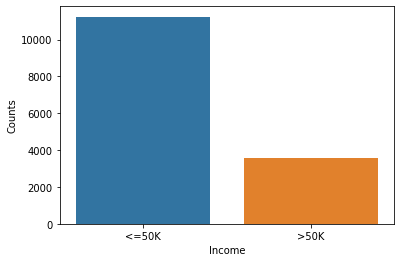

In [34]:
# Examine target class distrbutions

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=new_adult_trainingDF)
plt.xlabel('Income')
plt.ylabel('Counts')
plt.show()

In [35]:
#Encoidng the categoric columns


from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_adultTrainingDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, new_adult_trainingDF.shape[1]):
    if new_adult_trainingDF.dtypes[i]=='object' or new_adult_trainingDF.dtypes[i]=='bool':
        encoded_adultTrainingDF[new_adult_trainingDF.columns[i]] = le.fit_transform(new_adult_trainingDF[new_adult_trainingDF.columns[i]])
    else:
        encoded_adultTrainingDF[new_adult_trainingDF.columns[i]] = new_adult_trainingDF[new_adult_trainingDF.columns[i]]
        
encoded_adultTrainingDF.head(10)

,marital-status,capital-gains-losses,income
0,2,0,0
1,0,0,0
2,3,0,0
3,2,0,1
4,4,14084,1
5,2,0,1
6,2,0,0
7,2,2042,0
8,2,0,1
9,0,0,0


**Splitting the data into Train and Test data sets**

In [36]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultTrainingDF.filter(['marital-status','capital-gains-losses'], axis=1)
y = encoded_adultTrainingDF['income']


# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (11837, 2)
Test size: (2960, 2)


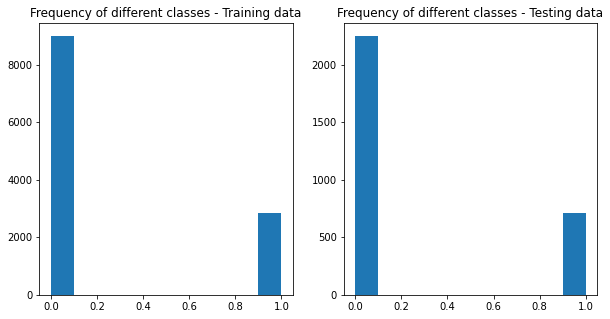

In [37]:
# Find out class distributions in training and test datasets.

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Testing data');

In [38]:
#importing all the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

**Creating function makeDTModel()**

In [39]:
def makeDTModel(criterion, X_train, y_train,max_depth=None,max_leaf_nodes=None):
  decisionTreeClassifier1 = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,
                                max_leaf_nodes=max_leaf_nodes,random_state = 120)
  decisionTreeClassifier1.fit(X_train,y_train)
  return decisionTreeClassifier1

**Creating function displayTree()**

In [40]:
# display text and graphic representation of a tree classifier
def displayTree(classifier, X):
  cn = ['low_income', 'hi_income']
  tree.plot_tree(classifier, feature_names=X.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)

**Creating function displayCM() for displaying Confusion Matrix**

In [41]:
# display text and heatmap of a confusion matrix
def displayCM(classifier, X_train, y_train, X_test, y_test):
  predictions = classifier.predict(X_test)
  confusionMatrix = confusion_matrix(y_true=y_test, y_pred = predictions)
  print(confusionMatrix)
  
  sns.heatmap(confusionMatrix, annot=True, linewidths=.5, square = True, cmap = 'Pastel2_r', fmt='0.4g');
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title("Cart classifier1")

**Creating function compareModels() for comparing both 'CART' & 'C5.0' Models**

In [42]:
# create and display plots of side-by-side model comparisons
def compareModels(cart_classifier, c5_classifier):
  labels = ['CART', 'C5.0']

  # Record CART's classification accuracy on tarining and test datasets
  cart_train_score1 = round(cart_classifier.score(X_train, y_train), 2) # training score
  cart_test_score1 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

  print ("CART Model Training and Testing scores: %.2f, %.2f" %  (cart_train_score1, cart_test_score1))


  # Record C5's classification accuracy on tarining and test datasets
  c5_train_score1 = round(c5_classifier1.score(X_train, y_train), 2) # training score
  c5_test_score1 = round(c5_classifier1.score(X_test, y_test), 2)   # testing score

  print ("C5.0 Model Training and Testing scores: %.2f, %.2f" %  (c5_train_score1, c5_test_score1))


  training_scores = [cart_train_score1, c5_train_score1]
  testing_scores =  [cart_test_score1, c5_test_score1]

  x = np.arange(2)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='cyan')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='darkmagenta')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()

## **Model1: Display tree, Confusion Matrix and  Classification accuracy for cart_classifier1 and c5_classifier1**

In [43]:
# Taking max_depth=2 and max_leaf_nodes=3
cart_classifier1 = makeDTModel("gini", X_train, y_train,2,4)
c5_classifier1 = makeDTModel("entropy", X_train, y_train,2,4)

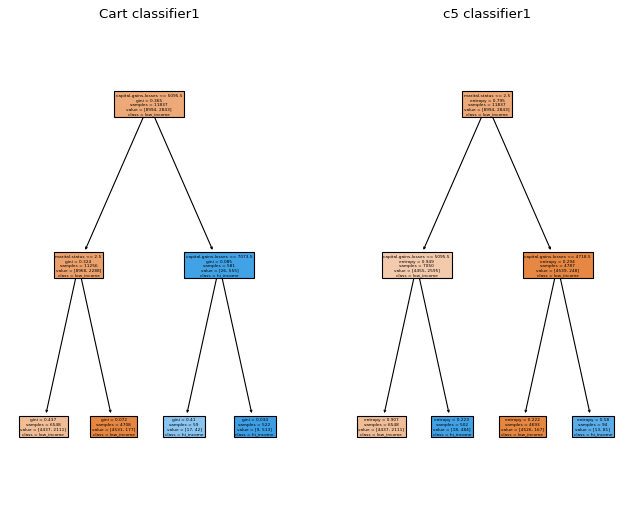

In [44]:
# Display tree for cart_classifier1

plt.figure(figsize=(10, 8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier1, X)
plt.title("Cart classifier1")

# Display tree for c5_classifier1
plt.subplot(1,2,2)
displayTree(c5_classifier1, X)
plt.title("c5 classifier1")
plt.show()

Confusion Matrix of CART model:
[[2238   11]
 [ 583  128]]
Confusion Matrix of C5.0 model:
[[2235   14]
 [ 583  128]]


Text(0.5, 1.0, 'C5 classifier1')

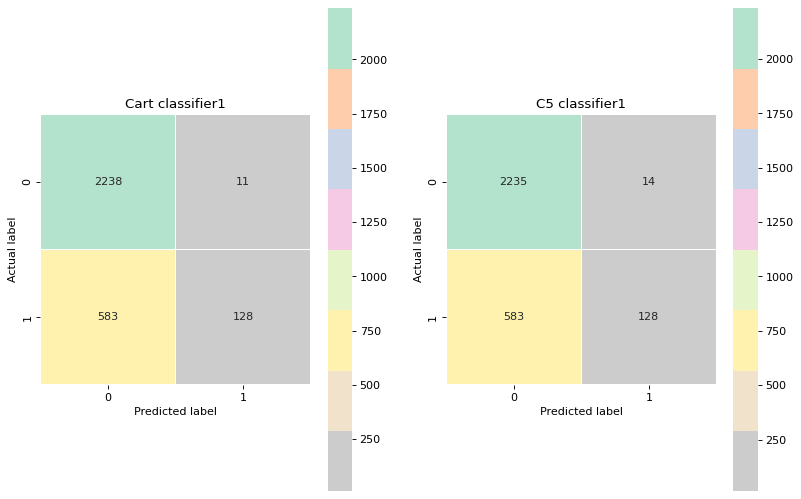

In [45]:
# Display CM for cart_classifier1
plt.figure(figsize=(12, 8), dpi=80)

print('Confusion Matrix of CART model:')
plt.subplot(1,2,1)
cart_cm1 = displayCM(cart_classifier1, X_train, y_train, X_test, y_test)
plt.title("Cart classifier1")

# Display CM for c5_classifier1
print('Confusion Matrix of C5.0 model:')
plt.subplot(1,2,2)
c5_cm1 = displayCM(c5_classifier1, X_train, y_train, X_test, y_test)
plt.title("C5 classifier1")

CART Model Training and Testing scores: 0.80, 0.80
C5.0 Model Training and Testing scores: 0.80, 0.80


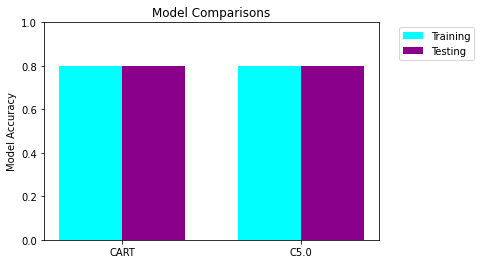

In [46]:
# Accuracy Scores and plots for side-by-side model comparisons of cart_classifier1 and c5_classifier1
compareModels(cart_classifier1, c5_classifier1)

## **Model2: Display tree, Confusion Matrix and Classification accuracy for cart_classifier2 and c5_classifier2**


In [47]:
# Taking max_depth=3 and max_leaf_nodes=4
cart_classifier2 = makeDTModel("gini", X_train, y_train,4,5)
c5_classifier2 = makeDTModel("entropy", X_train, y_train,4,5)

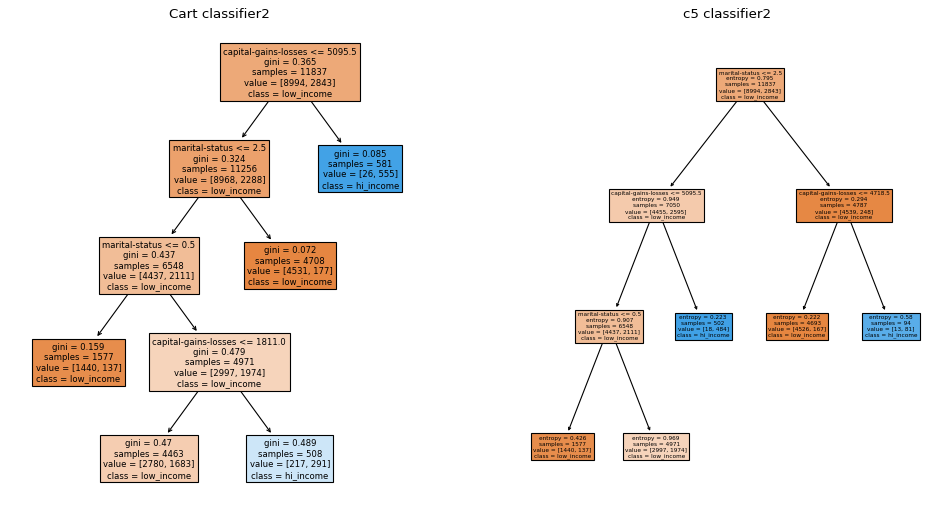

In [48]:
# Display tree for cart_classifier2

plt.figure(figsize=(15, 8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier2, X)
plt.title("Cart classifier2")

# Display tree for c5_classifier2
plt.subplot(1,2,2)
displayTree(c5_classifier2, X)
plt.title("c5 classifier2")
plt.show()

Confusion Matrix of CART model:
[[2187   62]
 [ 511  200]]
Confusion Matrix of C5.0 model:
[[2235   14]
 [ 583  128]]


Text(0.5, 1.0, 'C5 classifier2')

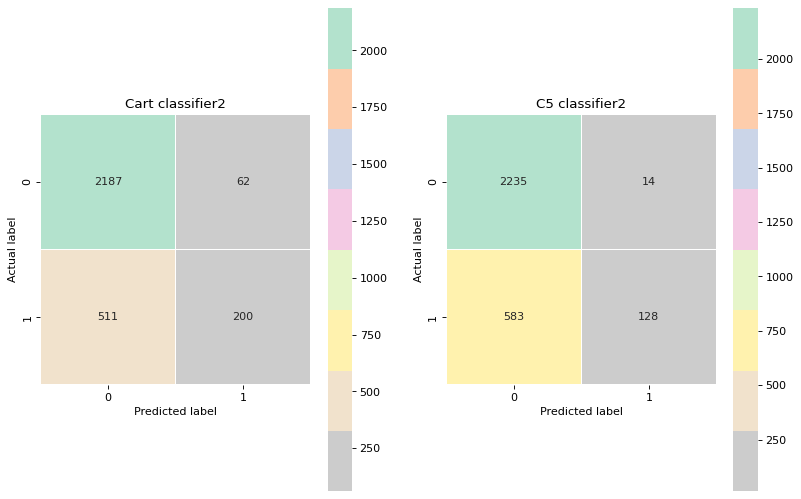

In [49]:
# Display CM for cart_classifier2
plt.figure(figsize=(12, 8), dpi=80)

print('Confusion Matrix of CART model:')
plt.subplot(1,2,1)
cart_cm1 = displayCM(cart_classifier2, X_train, y_train, X_test, y_test)
plt.title("Cart classifier2")

# Display CM for c5_classifier2
print('Confusion Matrix of C5.0 model:')
plt.subplot(1,2,2)
c5_cm1 = displayCM(c5_classifier2, X_train, y_train, X_test, y_test)
plt.title("C5 classifier2")

CART Model Training and Testing scores: 0.81, 0.81
C5.0 Model Training and Testing scores: 0.80, 0.80


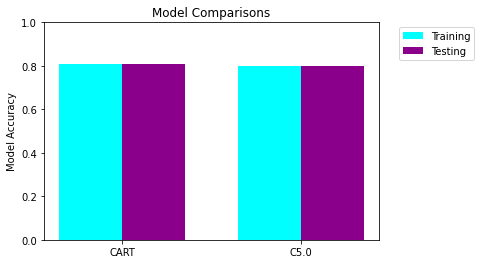

In [50]:
# Accuracy Scores and plots for side-by-side model comparisons of cart_classifier2 and c5_classifier2
compareModels(cart_classifier2, c5_classifier2)

## **Model3: Display tree, Confusion Matrix and Classification accuracy for cart_classifier3 and c5_classifier3**

In [51]:
# Taking max_depth=4 and max_leaf_nodes=5
cart_classifier3 = makeDTModel("gini", X_train, y_train,3,3)
c5_classifier3 = makeDTModel("entropy", X_train, y_train,3,3)

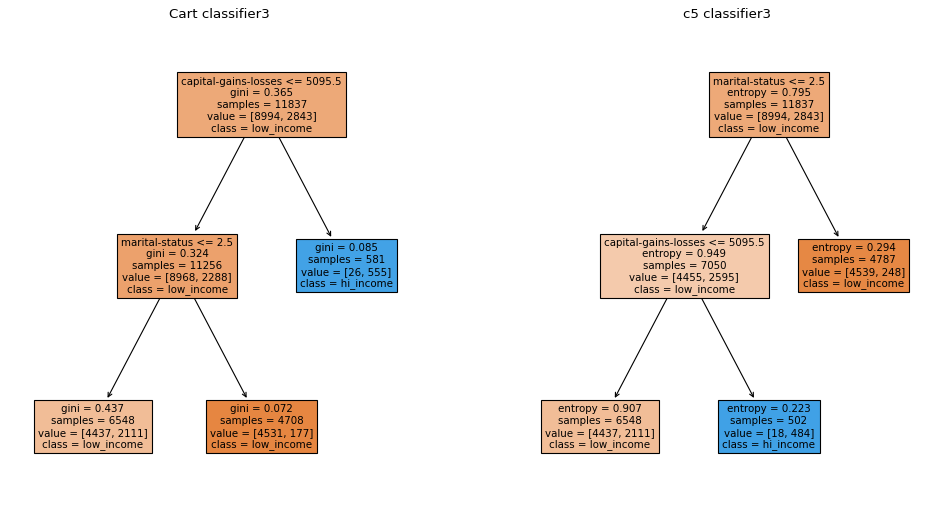

In [52]:
# Display tree for cart_classifier3

plt.figure(figsize=(15, 8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier3, X)
plt.title("Cart classifier3")

# Display tree for c5_classifier3
plt.subplot(1,2,2)
displayTree(c5_classifier3, X)
plt.title("c5 classifier3")
plt.show()

Confusion Matrix of CART model:
[[2238   11]
 [ 583  128]]
Confusion Matrix of C5.0 model:
[[2243    6]
 [ 597  114]]


Text(0.5, 1.0, 'C5 classifier3')

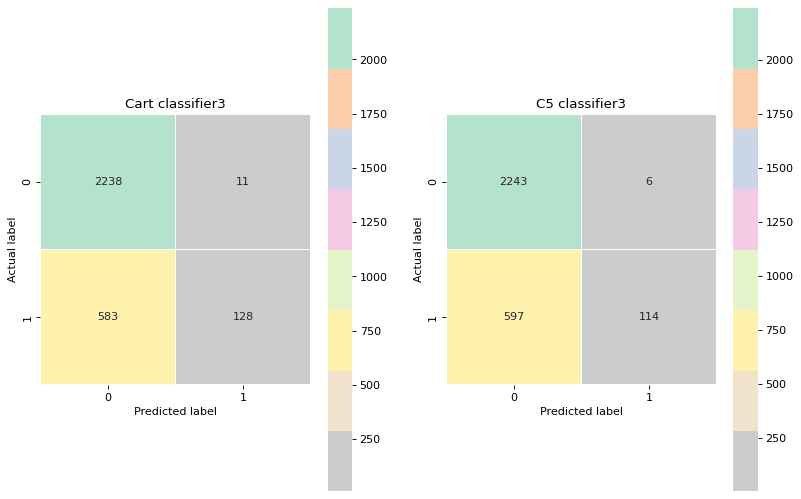

In [53]:
# Display CM for cart_classifier3
plt.figure(figsize=(12, 8), dpi=80)

print('Confusion Matrix of CART model:')
plt.subplot(1,2,1)
cart_cm1 = displayCM(cart_classifier3, X_train, y_train, X_test, y_test)
plt.title("Cart classifier3")

# Display CM for c5_classifier3
print('Confusion Matrix of C5.0 model:')
plt.subplot(1,2,2)
c5_cm1 = displayCM(c5_classifier3, X_train, y_train, X_test, y_test)
plt.title("C5 classifier3")

CART Model Training and Testing scores: 0.80, 0.80
C5.0 Model Training and Testing scores: 0.80, 0.80


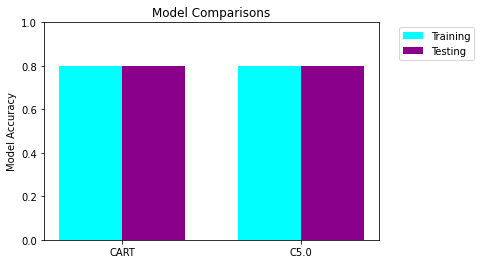

In [54]:
# Accuracy Scores and plots for side-by-side model comparisons of cart_classifier3 and c5_classifier3
compareModels(cart_classifier3, c5_classifier3)

## **Model4: Display tree, Confusion Matrix and Classification accuracy for cart_classifier4 and c5_classifier4**

In [55]:
# Taking max_depth=None and max_leaf_nodes=None
cart_classifier4 = makeDTModel("gini", X_train, y_train)
c5_classifier4 = makeDTModel("entropy", X_train, y_train)

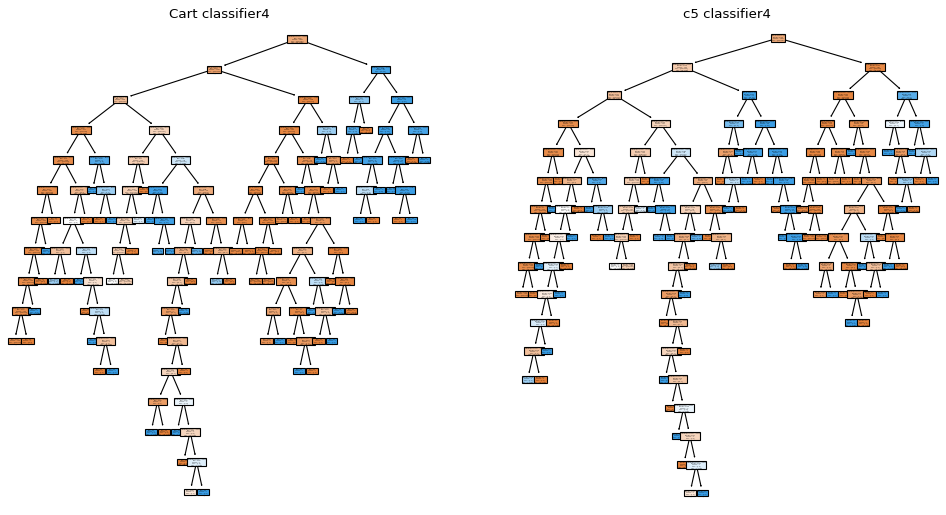

In [56]:
# Display tree for cart_classifier4

plt.figure(figsize=(15, 8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier4, X)
plt.title("Cart classifier4")

# Display tree for c5_classifier4
plt.subplot(1,2,2)
displayTree(c5_classifier4, X)
plt.title("c5 classifier4")
plt.show()

Confusion Matrix of CART model:
[[2238   11]
 [ 502  209]]
Confusion Matrix of C5.0 model:
[[2237   12]
 [ 502  209]]


Text(0.5, 1.0, 'C5 classifier4')

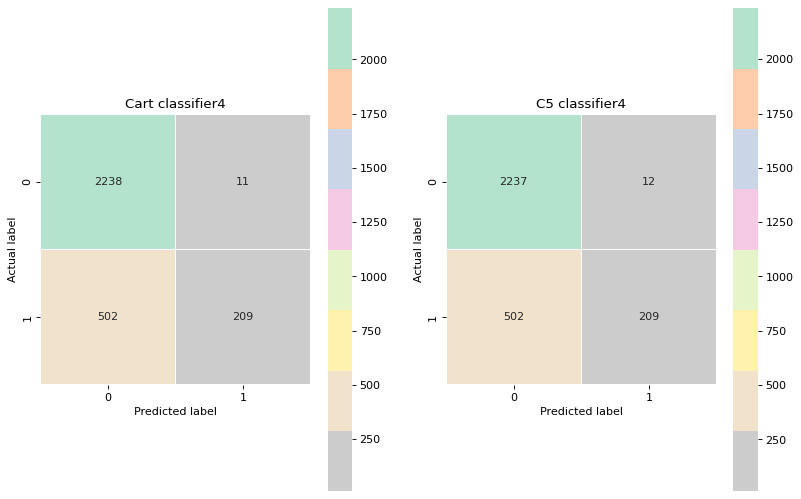

In [57]:
# Display CM for cart_classifier4
plt.figure(figsize=(12, 8), dpi=80)

print('Confusion Matrix of CART model:')
plt.subplot(1,2,1)
cart_cm1 = displayCM(cart_classifier4, X_train, y_train, X_test, y_test)
plt.title("Cart classifier4")

# Display CM for c5_classifier4
print('Confusion Matrix of C5.0 model:')
plt.subplot(1,2,2)
c5_cm1 = displayCM(c5_classifier4, X_train, y_train, X_test, y_test)
plt.title("C5 classifier4")


CART Model Training and Testing scores: 0.83, 0.83
C5.0 Model Training and Testing scores: 0.80, 0.80


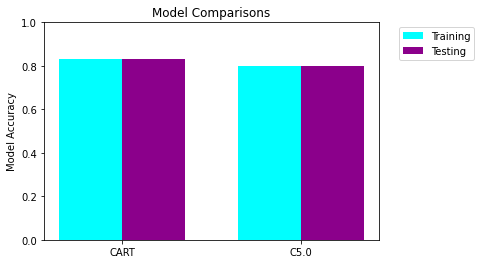

In [58]:
# Accuracy Scores and plots for side-by-side model comparisons of cart_classifier4 and c5_classifier4
compareModels(cart_classifier4, c5_classifier4)

## **Summary**

From the above all we can observe that,
*   With max_depth=2 and max leaf_node=4, we were able to achieve an accuracy of 80% for the CART and C5.0 models.
*   With max_depth=4 and max leaf_node=5, we were able to achieve an accuracy of 80% for the CART and C5.0 
models.
*   With max_depth=3 and max leaf_node=3, we were able to achieve an accuracy of 81% for the CART Model and 80% accuracy for C5.0 Model.
*   With max_depth=None and max leaf_node=None, we were able to achieve an accuracy of 83% for the CART Model and 80% accuracy for C5.0 Model.
*   Created four models each using  CART and C5.0 strategies by giving different values for the max_depth,max_leaf_node and observed that all of them different accuracy.
*   My insight after providing different values for max depth and max_leaf node values is the accuracy was improving.
*   By comparing the all the accuracies of 8 models we can conclude that, the Gini Index(CART) Model is more accurate than the Entropy(C5.0) Model.